In [1]:
import keras 
keras.__version__

Using TensorFlow backend.


'2.2.2'

# Overfitting and Underfitting

Overfitting happens in every single machine learning problem. Due to which we could notice that the performance of our model on the held-out validation data would always peak after a few epochs and would then start degrading.

We will be using the IMDB test set as our validation set. Let's first prepare our data.

In [2]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Fighting overfitting

### Reducing the network's size
The simplest way to prevent overfitting is to reduce the number of learnable parameters in the model. We don't want our model to have prefect dictionary-like mapping between traing samples and their targets, a mapping without any generalization power.

On the other hand, if the network has limited memorization resources, it will not be able to learn this mapping as easily, and thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets -- precisely the type of representations that we are interested in. At the same time, keep in mind that you should be using models that have enough parameters that they won't be underfitting: your model shouldn't be starved for memorization resources. There is a compromise to be found between "too much capacity" and "not enough capacity".



Unfortunately, there is no magical formula to determine what the right number of layers is, or what the right size for each layer is. You will have to evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the right model size for your data. The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the validation loss.

Let's try this on our movie review classification network. Our basic (original) network is as such:

In [14]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [15]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

Here's a comparison of the validation losses of the original network and the smaller network. 

In [16]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.4384 - acc: 0.8236 - val_loss: 0.3418 - val_acc: 0.8687
Epoch 2/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.2527 - acc: 0.9099 - val_loss: 0.2978 - val_acc: 0.8806
Epoch 3/20
25000/25000 [==============================] - 3s 136us/step - loss: 0.1952 - acc: 0.9301 - val_loss: 0.2844 - val_acc: 0.8855
Epoch 4/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.1636 - acc: 0.9430 - val_loss: 0.2964 - val_acc: 0.8829
Epoch 5/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.1389 - acc: 0.9520 - val_loss: 0.3364 - val_acc: 0.8719
Epoch 6/20
25000/25000 [==============================] - 3s 134us/step - loss: 0.1208 - acc: 0.9578 - val_loss: 0.3377 - val_acc: 0.8763
Epoch 7/20
25000/25000 [==============================] - 4s 151us/step - loss: 0.1039 - acc: 0.9654 - val_loss: 0.3632 - 

In [17]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 162us/step - loss: 0.6168 - acc: 0.7341 - val_loss: 0.5490 - val_acc: 0.8335
Epoch 2/20
25000/25000 [==============================] - 4s 160us/step - loss: 0.4709 - acc: 0.8701 - val_loss: 0.4332 - val_acc: 0.8684
Epoch 3/20
25000/25000 [==============================] - 4s 160us/step - loss: 0.3610 - acc: 0.8938 - val_loss: 0.3575 - val_acc: 0.8790
Epoch 4/20
25000/25000 [==============================] - 4s 158us/step - loss: 0.2896 - acc: 0.9080 - val_loss: 0.3138 - val_acc: 0.8864
Epoch 5/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.2434 - acc: 0.9192 - val_loss: 0.2947 - val_acc: 0.8859
Epoch 6/20
25000/25000 [==============================] - 4s 166us/step - loss: 0.2124 - acc: 0.9279 - val_loss: 0.2800 - val_acc: 0.8908
Epoch 7/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.1898 - acc: 0.9343 - val_loss: 0.2774 - 

In [18]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

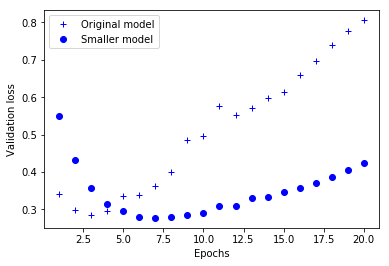

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

Now for kicks, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [20]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [21]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 246us/step - loss: 0.4608 - acc: 0.7899 - val_loss: 0.2749 - val_acc: 0.8887
Epoch 2/20
25000/25000 [==============================] - 6s 225us/step - loss: 0.2174 - acc: 0.9147 - val_loss: 0.2948 - val_acc: 0.8760
Epoch 3/20
25000/25000 [==============================] - 5s 218us/step - loss: 0.1267 - acc: 0.9531 - val_loss: 0.3196 - val_acc: 0.8857
Epoch 4/20
25000/25000 [==============================] - 6s 224us/step - loss: 0.0593 - acc: 0.9823 - val_loss: 0.4642 - val_acc: 0.8718
Epoch 5/20
25000/25000 [==============================] - 6s 223us/step - loss: 0.0709 - acc: 0.9865 - val_loss: 0.4968 - val_acc: 0.8816
Epoch 6/20
25000/25000 [==============================] - 5s 214us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.6624 - val_acc: 0.8784
Epoch 7/20
25000/25000 [==============================] - 6s 222us/step - loss: 1.4047e-04 - acc: 1.0000 - val_loss: 0.878

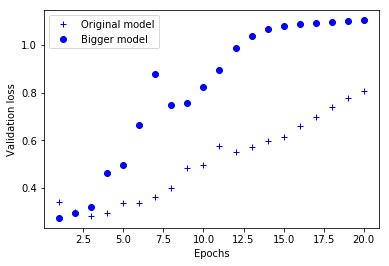

In [23]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

The bigget model starts overfitting almost right away, after just one epoch, and overfits much more severekym Its validation loss is also more noisy.

Meanwhile, here are the training losses for our two networks:

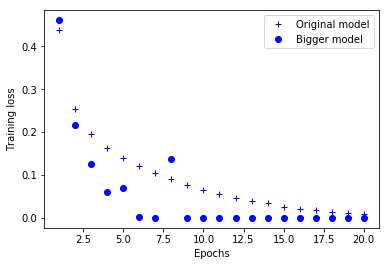

In [24]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend();

## Adding weight regularization


In [25]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

Here's the impact of our L2 regularization penalty:


In [27]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 156us/step - loss: 0.4987 - acc: 0.8206 - val_loss: 0.4033 - val_acc: 0.8610
Epoch 2/20
25000/25000 [==============================] - 3s 135us/step - loss: 0.3204 - acc: 0.9058 - val_loss: 0.3367 - val_acc: 0.8893
Epoch 3/20
25000/25000 [==============================] - 3s 132us/step - loss: 0.2769 - acc: 0.9181 - val_loss: 0.3339 - val_acc: 0.8881
Epoch 4/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.2545 - acc: 0.9256 - val_loss: 0.3339 - val_acc: 0.8874
Epoch 5/20
25000/25000 [==============================] - 3s 117us/step - loss: 0.2428 - acc: 0.9307 - val_loss: 0.3408 - val_acc: 0.8855
Epoch 6/20
25000/25000 [==============================] - 3s 119us/step - loss: 0.2330 - acc: 0.9363 - val_loss: 0.3486 - val_acc: 0.8834
Epoch 7/20
25000/25000 [==============================] - 3s 113us/step - loss: 0.2278 - acc: 0.9392 - val_loss: 0.3634 - 

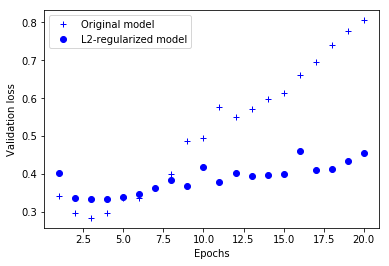

In [28]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();

## Adding dropouts

In [29]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [30]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 161us/step - loss: 0.5934 - acc: 0.6733 - val_loss: 0.4664 - val_acc: 0.8508
Epoch 2/20
25000/25000 [==============================] - 4s 148us/step - loss: 0.4437 - acc: 0.8196 - val_loss: 0.3515 - val_acc: 0.8808
Epoch 3/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.3626 - acc: 0.8702 - val_loss: 0.3045 - val_acc: 0.8857
Epoch 4/20
25000/25000 [==============================] - 4s 141us/step - loss: 0.3075 - acc: 0.8952 - val_loss: 0.2858 - val_acc: 0.8879
Epoch 5/20
25000/25000 [==============================] - 3s 138us/step - loss: 0.2630 - acc: 0.9118 - val_loss: 0.2855 - val_acc: 0.8864
Epoch 6/20
25000/25000 [==============================] - 3s 139us/step - loss: 0.2343 - acc: 0.9230 - val_loss: 0.2934 - val_acc: 0.8850
Epoch 7/20
25000/25000 [==============================] - 4s 145us/step - loss: 0.2077 - acc: 0.9331 - val_loss: 0.3103 - 

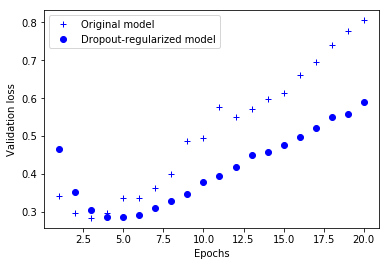

In [32]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend();


Again, a clear improvement over the reference network.

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.